In [1]:
%matplotlib inline
from common.plot_fcns import *
import cPickle as pkl
from common.h5py_data_loader import H5pyDataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import combinations
from common.chembl_export_data_loader import DrugMatrixDataLoader

In [2]:
def get_kfold_dataloader(dset, kfold_file):
    return H5pyDataLoader(hdf5_file=dataset, target_map_file=None, train_percentage=None, test_indices_file=kfold_file)

def get_counts(activity_df):
    notna = ~np.isnan(activity_df)
    gfive = activity_df>5.0
    leqfive = activity_df<=5.0
    npos = np.sum(notna & gfive)
    nneg = np.sum(notna & leqfive)
    ntot = np.sum(notna)
    return npos, nneg, ntot


In [3]:
data_save_base = get_env_var("DATA_SAVE_BASE")

In [4]:
dset_base = "{}/20180525_DM_scrubbing/train_data/".format(data_save_base)
all_dat = "{}/chembl20_MWmax800_scrubDM_minpos10_cutoff5.hdf5".format(dset_base)
all_target_map = "{}/chembl20_MWmax800_scrubDM_minpos10_cutoff5_target_index.pkl".format(dset_base)

target_map = "{}/ts2012_chembl20_MWmax800_scrubDM_minpos10_cutoff5_target_index.pkl".format(dset_base)
train_dat = "{}/train_ts2012_chembl20_MWmax800_scrubDM_minpos10_cutoff5.hdf5".format(dset_base)
test_dat = "{}/val_ts2012_chembl20_MWmax800_scrubDM_minpos10_cutoff5.hdf5".format(dset_base)\

In [5]:
dl =  H5pyDataLoader(hdf5_file=all_dat, target_map_file=all_target_map, train_percentage=None)
train_dl = H5pyDataLoader(hdf5_file=train_dat, target_map_file=target_map, train_percentage=None)
ts_dl = H5pyDataLoader(hdf5_file=test_dat, target_map_file=target_map, train_percentage=None)

In [6]:
from common.chembl_export_data_loader import DrugMatrixDataLoader

In [7]:
dm_dl = DrugMatrixDataLoader()

/srv/home/ecaceres/labgits/neural-nets/common/chembl_export_data_loader.py:101: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  tdf.sortlevel(['target', 'compound'], inplace=True)


In [8]:
dl.load_training_data()
acts = dl.all_act
pos = dl.all_pos
not_na = ~np.isnan(acts)
gfive = acts>5.0
leqfive = acts <= 5.0
target_info_lookup = {}
for chemblid, idx in dl.target_map.iteritems():
    target_mask = (pos == idx)
    target_mask = (target_mask & not_na)
    target_info_lookup[chemblid] = {"npos": (target_mask&gfive).sum(), "nneg": (target_mask&leqfive).sum(), "ntot": target_mask.sum()}

/srv/home/ecaceres/anaconda2/envs/features/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/srv/home/ecaceres/anaconda2/envs/features/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


In [9]:
dset_df= pd.DataFrame.from_dict(target_info_lookup, orient="index").reset_index()

In [10]:
dset_df.to_csv("pos_to_negative_ratio_all.csv")

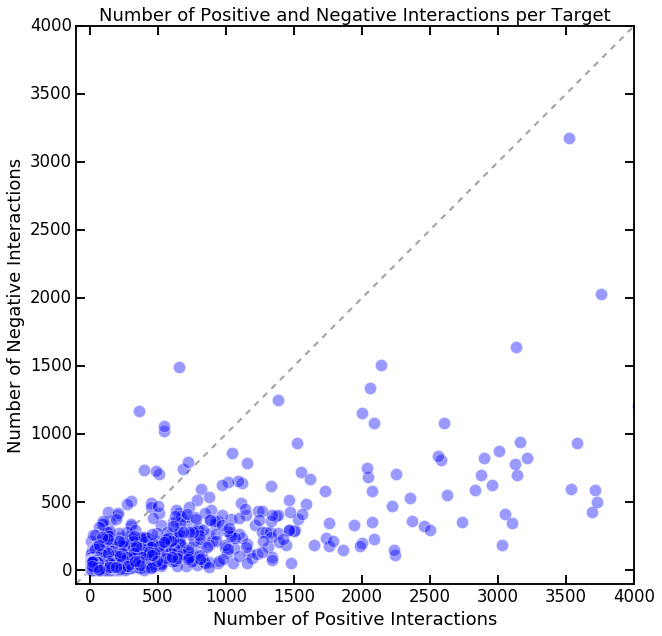

In [11]:
save_dir = "{}/final_paper_figs".format(get_env_var("HOME"))

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="npos", y="nneg", data=dset_df,alpha=0.4, s=150, color="b", lw=1)
plt.xlim((-100,4000))
plt.ylim((-100,4000))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, ls="--", lw=2, color="grey")
plt.xlabel("Number of Positive Interactions")
plt.ylabel("Number of Negative Interactions")
plt.title("Number of Positive and Negative Interactions per Target")
plt.show()
plt.savefig("{}/Figure1.png".format(save_dir), dpi=300)


In [12]:
train_dl.load_training_data()
acts = train_dl.all_act
pos = train_dl.all_pos
not_na = ~np.isnan(acts)
gfive = acts>5.0
leqfive = acts <= 5.0
target_info_lookup_train = {}

for chemblid, idx in train_dl.target_map.iteritems():
    target_mask = (pos == idx)
    target_mask = (target_mask & not_na)
    target_info_lookup_train[chemblid] = {"npos": (target_mask&gfive).sum(), "nneg": (target_mask&leqfive).sum(), "ntot": target_mask.sum()}
    
ts_dl.load_training_data()
acts = ts_dl.all_act
pos = ts_dl.all_pos
not_na = ~np.isnan(acts)
gfive = acts>5.0
leqfive = acts <= 5.0
target_info_lookup_ts = {}
for chemblid, idx in ts_dl.target_map.iteritems():
    target_mask = (pos == idx)
    target_mask = (target_mask & not_na)
    target_info_lookup_ts[chemblid] = {"npos": (target_mask&gfive).sum(), "nneg": (target_mask&leqfive).sum(), "ntot": target_mask.sum()}

/srv/home/ecaceres/anaconda2/envs/features/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/srv/home/ecaceres/anaconda2/envs/features/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  
/srv/home/ecaceres/anaconda2/envs/features/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/srv/home/ecaceres/anaconda2/envs/features/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


In [13]:
dset_df_train= pd.DataFrame.from_dict(target_info_lookup_train, orient="index").reset_index()
dset_df_ts= pd.DataFrame.from_dict(target_info_lookup_ts, orient="index").reset_index()

In [14]:
sns.set_context("talk")  
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="npos", y="nneg", data=dset_df_train, alpha=0.4, s=150, color="b", lw=1, label="Train targets")
sns.scatterplot(x="npos", y="nneg", data=dset_df_ts, alpha=0.4, s=150, color="r", lw=1, label="Time Split targets")
plt.xlim((-100,4000))
plt.ylim((-100,4000))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, ls="--", lw=2, color="grey")
plt.xlabel("Number of Positive Interactions")
plt.xlabel("Number of Negative Interactions")
plt.title("Ratio of Positive to Negative Interactions per Target")

SyntaxError: invalid syntax (<ipython-input-14-979ad0b9df01>, line 1)